In [1]:
# SQlite는 가벼운 것이 특징이다.
# 대용량 데이터베이스를 사용할 수 없을 경우 사용한다.
# 스마트폰에도 데이터베이스가 다 있다. 연락처도 일종의 데이터베이스이다. 
# 제한적 환경에서 사용되는 데이터베이스이다. 


In [17]:
import sqlite3
import pandas as pd
import numpy as np

In [10]:
query = """
CREATE TABLE test                   
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""
# 테이블을 생성해라. 테이블 이름은 test로 설정한다.
# 소괄호 기호를 사용해서 열들과 타입 등을 정의할 수 있다.
# a,b,c,d는 엑셀의 열과 같다. 바캐릭터는 크기가 변할 수 있는 캐릭터타입이다. 문자의 길이가 20글자라는 뜻이다.
# varchar는 크기가 유동적일 수 있다는 뜻도 된다. 
# char는 무조건 20칸을 소모한다. varchar는 남는 칸이 있으면 공간이 반납된다.
# 절대 20을 넘어가면 안된다. 잘리게 된다. 이건 char나 varchar나 똑같다.
# 변수간의 구분은 콤마로 한다.
# real은 실수이다.
# integer는 정수이다.
# 세미콜론;은 마지막으로 마무리짓는다는 뜻이다.
# 스킴은 구조라고 말한다 schema(스키마)라고 정의한다. 


In [11]:
con = sqlite3.connect("mydata.sqlite") #연결하고자 하는 데이터가 없으면 데이터가 만들어진다. 현재 mydata.sqlite라는 파일이 만들어졌다.
con.execute(query) #데이터베이스 파일을 하나로 추상화시켜놓은 것이다. excute는 집행이다. 쿼리 안에 con을 연결하는 것이다. 쿼리는 sql로 작성된 명령이다.
con.commit() # 콘은 데이터베이스에 연결을 한 객체이다. 콘을 이용하여 명령을 수행하면 해당 데이터베이스 안에서 명령이 수행된다.
# commit "이 명령을 완료하라"라는 뜻이다. rollback이라는 함수는 여기에 반대된다. 저장하기 이전의 상태로 돌아가는 것이다.
# rollback함수는 임베디드 기계의 "취소"버튼과 같다.
# 지금까지의 과정으로 테이블이 하나 만들어진 것이다.
# 데이터베이스는 테이블과 같다. 테이블의 모임을 워크북(파일)이라고 한다.
# 굉장히 많은 데이터베이스들이 서버에 존재한다. 
# 현재 상황에서는 데이터베이스("mydata.sqlite") ->테이블('test')이다.

OperationalError: table test already exists

In [12]:
# 데이터베이스의 탄생
# 데이터가 발생하면 그 데이터를 저장관리하는 과정을 수행한다. 
# 만약 중복데이터가 있거나 중복된 데이터로부터 일관성이 떨어지는 등의 문제가 발생할 수 있다.
# 파일들에 대해서 관리측면에서 볼때 다양한 사람들이 공유할 수 있으면 좋겠다.그로 인해 데이터베이스가 만들어졌다.
# 데이터베이스 사용은 데이터베이스와 연결을 해야 사용할 수 있다.
# 현실 데이터 발생 -> 저장(파일)/관리 -> 데이터베이스 -> 연결(con)->명령수행(excute) ->SQL(명령어)


In [13]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()
#해석하자면 다음과 같다.
# 데이터에는 3개의 요소가 존재하고 그 하위에는 4개의 요소가 저장되어 있다.
# 이름 2개, 수치데이터 2개씩 존재한다. 
# INSERT INTO test VALUES 는 테스트 테이블에 값을 대입하라. 물음표는 데이터를 나타낸다. 
# executemany(stmt,data)는 실행칸이다. 3줄에 걸쳐서 명령어를 수행하게 된다. 3줄에 대해 데이터가 저장될 것이다.
# 커밋은 명령이 정상적으로 이루어졌고 완료했다는 의미이다. 

In [14]:
cursor = con.execute("SELECT * FROM test") # 테스트 테이블에 전체 데이터(*)를 선택해서 가져와라
rows = cursor.fetchall() # 데이터를 전체나열하라.
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [15]:
!rm mydata.sqlite #데이터베이스 삭제용으로 쓴다.

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [18]:
# 외부의 데이터베이스를 가져와서 데이터를 분석하고 싶다고 하자. 
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [19]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [20]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])
string_data
string_data.isna()
# 문자열의 nan이 두개가 정상 출력되었다.

0    False
1     True
2     True
3    False
dtype: bool

In [21]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data
float_data.isna()

0    False
1    False
2     True
dtype: bool

In [22]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna() #nan값을 제거하고 출력했다.

0    1.0
2    3.5
4    7.0
dtype: float64

In [23]:
data[data.notna()]#불린참조. 자세한 설명은 생략한다.

0    1.0
2    3.5
4    7.0
dtype: float64

In [24]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data
data.dropna()
# 4행 3열인데 NaN이 포함된 행이 전부 삭제되어버렸다. dropna는 함부러 사용하면 이렇게 된다. 
# 데이터가 결측값이 있다면 같은 행의 데이터가 전부 사라진다.


,0,1,2
0,1.0,6.5,3.0


In [25]:
data.dropna(how="all") #모든 데이터가 결측값인 경우에 대해서만 삭제한다. 
# 일반적으로 이렇게 사용한다. 2번행은 전부nan이라서 제거되었다.


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [26]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [27]:
data.dropna(how="all") #행만 제거되었다.

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [28]:
data.dropna(how="all", axis ='columns')  #열만 제거되었다. 

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [29]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df
#(np.random.standard_normal((7, 3)))표준정규분포로부터 임의의 난수를 추출하여 7행 3열로 정리한 것이다.
# 3행까지 1열을 전부 nan으로 바꾸고 1행까지 2열을 전부 nan으로 바꾼 상태이다.
# 데이터가 이런 모양인 경우가 많다.
# nan이 있는 데이터가 많아서 dropna를 쓰면 반 이상이 날아가버릴 것이다. nan이 한개라도 있으면 멀쩡한 데이터가 날아갈 수 있다.
# 만약 nan 자리에 다른 요소를 채워넣는다고 고려해보자. 예측값을 대입할 수도 있다.
# 과거데이터를 바탕으로 추이를 예상할 수도 있다. 최솟값을 추가하거나 최댓값을 추가할 수 있다.
# 0번을 기준으로 가장 비슷한 자료(4번)를 찾아서 채울 수도 있다.

,0,1,2
0,-0.448765,NaN,NaN
1,-0.048378,NaN,NaN
2,-1.505438,NaN,0.503157
3,0.577857,NaN,0.501469
4,0.500506,0.387282,-0.738137
5,0.015734,-0.093741,-0.058334
6,0.040498,-1.826429,0.045216


In [30]:
df.fillna(method="ffill") #이건 아래로 채우는 것이다.

,0,1,2
0,-0.448765,NaN,NaN
1,-0.048378,NaN,NaN
2,-1.505438,NaN,0.503157
3,0.577857,NaN,0.501469
4,0.500506,0.387282,-0.738137
5,0.015734,-0.093741,-0.058334
6,0.040498,-1.826429,0.045216


In [31]:
df.fillna(method="bfill") #위로 채워보자
#단순하게 위아래로 채우는 방법이다.


,0,1,2
0,-0.448765,0.387282,0.503157
1,-0.048378,0.387282,0.503157
2,-1.505438,0.387282,0.503157
3,0.577857,0.387282,0.501469
4,0.500506,0.387282,-0.738137
5,0.015734,-0.093741,-0.058334
6,0.040498,-1.826429,0.045216


In [32]:
df

,0,1,2
0,-0.448765,NaN,NaN
1,-0.048378,NaN,NaN
2,-1.505438,NaN,0.503157
3,0.577857,NaN,0.501469
4,0.500506,0.387282,-0.738137
5,0.015734,-0.093741,-0.058334
6,0.040498,-1.826429,0.045216


In [34]:
df.dropna() # 데이터가 절반 이상 날아갔다.

,0,1,2
4,0.500506,0.387282,-0.738137
5,0.015734,-0.093741,-0.058334
6,0.040498,-1.826429,0.045216


In [35]:
df.dropna(thresh=2)#임계값을 2로 부여한다. 결측값이 2개 이상인 경우에 dropna가 수행된다. 생각보다 자주 쓰인다.
# 결측값이 일정 이상이면 데이터를 버리라는 명령이다. 즉 결측값의 갯수 설정이 중요하다.

,0,1,2
2,-1.505438,NaN,0.503157
3,0.577857,NaN,0.501469
4,0.500506,0.387282,-0.738137
5,0.015734,-0.093741,-0.058334
6,0.040498,-1.826429,0.045216


In [36]:
df= pd.read_csv("titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
df.info() #891은 결측값이 없다. 다른 숫자는 결측값이 있다는 것이다.
# 재밌는 것은 데이터 분석에서 cabin은 중요한 요소이다. 제거하면 안된다. 
# 어떤 열들이 모델에 결과를 도출하는데 중요한지를 구분해야 한다.
# 상황분석이 그래서 필요하다. 배경지식을 알아야 하는 것이다. 모든 모델이 동일하다.
# 일반적인 데이터들에 대해서는 지식이 전무한 것이 일반적이다. 그래서 한계가 존재한다.
# 상당히 어려운 점이 이런 부분이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df[df["Age"].isna()][['Fare','Pclass']]

,Fare,Pclass
5,8.4583,3
17,13.0000,2
19,7.2250,3
26,7.2250,3
28,7.8792,3
...,...,...
859,7.2292,3
863,69.5500,3
868,9.5000,3
878,7.8958,3


In [49]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [50]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [51]:
data.fillna(0) # 결측값을 전부 0으로 채운다는 것이다.

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [52]:
# 데이터 스크래핑에 대한 것을 배워보자.
# 웹 스크래핑(크롤링)은 웹에 있는 데이터를 수집하는 행위를 말한다. 
# 데이터를 수집하기 위한 작업이다.
# 데이터를 전처리하는 작업이 많이 필요하다. 보편적으로는 데이터를 수집한 다음에 전처리하는 과정을 수행한다.
# 데이터 수집과 더불어 데이터를 전처리하는 과정을 배우게 될 것이다.
# 먼저 셀레늄을 설치하자.

In [53]:
pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/f9/2f/9c6eef6487faca5006ae1ba43cf6ab627c7e3d2a7ec5a3b8728e2105472d/selenium-4.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/f2/25/868488d8b05104e3d1bf162565bbadd5fe6d62bf903710e6402c3aaceb1e/trio_websocket-0.10.4-py3-none-any.whl.metadata
  Obtaining dependency information for exceptiongroup from https://files.pythonhosted.org/packages/ad/83/b71e58666f156a39fb29417e4c8ca4bc7400c0dd4ed9e8842ab54dc8c344/exceptiongroup-1.1.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ---------------------------------------- 58.3/58.3 kB 1.5 MB/s eta 0:00:00
   -----------

In [54]:
from selenium import webdriver
# 웹드라이버 불러오는 작업이다.

In [58]:
# 책이나 인터넷에서 데이터를 수집하는 것은 우리가 배우는 것과는 다르다. 기존 코드보다는 바뀐 코드로 사용하는 것이 좋다.
driver = webdriver.Chrome()# 크롬 브라우저를 컨트롤 해 줄수 있게 만드는 함수이다.
# 이 함수를 사용하면 크롬 웹 브라우저를 조종할 수 있다.
# 크롬의 파일 경로를 괄호 안에 적어야 했다. 하지만 지금은 필요없다.
# 실행시 빈 창이 하나 뜰 것이다. 
# 주의요함이 뜰 것이다. 크롬이 자동화된 테스트 소프트웨어에 의해 제어된다고 나올 것이다. 즉 위의 것은 드라이버 컨트롤러다.
# 드라이버변수에는 화면을 제어할 수 있는 컨트롤러가 들어간다.
# 특정 페이지로 이동하여 코드를 가져와보자


In [59]:
url = "https://www.naver.com/"
driver.get(url)#네이버를 url에 대입하여 접속하라.

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https:
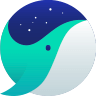
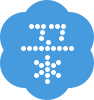

In [60]:
html=driver.page_source # 해당 페이지 소스코드를 가져와라
html 
# 페이지 안에 특정 내용을 발췌하기 위함이다. 데이터 수집을 위해서이다.


In [61]:
# 우리는 트렌드를 분석하고 싶다. 1위부터 100위까지 유튜브 랭킹은 어땠을까 조사를 해보자.
# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube
# 유튜브 랭킹 사이트이다. 이 사이트를 이용해서 조사를 해본다고 가정해보자.
# 전체 8794건이니 88페이지의 자료가 존재할 것이다.  카테고리, 유튜버, 설명등을 긁어오는 것을 목적으로 한다.
# 크롤링 도구는 이럴 때 활용된다.
# 주의사항
# 크롤링은 잘못하면 법적인 분쟁이 야기된다. 예전에 잡코리아의 자료를 사람인에서 크롤링을 해서 가져오게 된 사건이 있었다. 
# 자동으로 가지고오게 해서 사람인이 패소하여 120억의 합의금을 지급하는 사건이 발생했다.
# 복제 자체는 문제가 되는 것이 아니다. 하지만 복제를 통해 영리를 추구하는 경우에는 문제가 발생할 수 있다.

In [73]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''
# html문서는 이와 같이 태그라고 하는 것들로 구성이 되어있다. 태그를 이용하여 문서를 구성하여 브라우저에 보여지게 된다.
# 우리가 원하는 것은 페이지 안에 있는 특정 정보를 데이터로 저장하려고 하는 것이다.
# 페이지에서 특정 부분을 가지고 오게되는데 내가 가지고오는 특정부분을 선택해서 읽어오기 위해서 사용하는 함수를 알아보자.
# 상당수의 사이트는 가져가지 못하게 막아놓기도 했다.
# 스크래핑하는 행위를 차단하는 사이트들이 많이 존재한다. 서버에 과부화를 일으킬 수 있기 때문이다.
# 우회경로를 통해서 비밀리에 크롤링한다면 위법이 된다. 정상적인 방법으로 수행하는 경우에 문제가 되지 않지만 비정상적일 경우 문제가 된다.


In [74]:
# 우리가 배운 str, split, findall같은 것들을 알고 있다. 이 것들을 사용할 수 있지만 코드가 길어지고 코딩하기도 까다롭다.
# 구조가 정해져있지 않고 자유롭게 기술된 경우가 많기 때문이다. 그로 인하여 코드가 길어질 수 있다.
# 그래서 별도의 도구 BeautifulSoup를 사용한다.

In [77]:
from bs4 import BeautifulSoup #다. 대문자로 시작하는 것은 클래스라고 통상적으로 약속되어진다.
# html 문서 구조 및 내용 추출을 위한 도구이다. 두 개의 칸으로 적혀있다. 

In [78]:
soup = BeautifulSoup(html,'html.parser')
#위의 구조가 동일하게 나온다. 들여쓰기가 안되어있는 것은 단점이다. 현재에는 분석에 용이한 형태로 변경한 결과를 확인하고 있다.
#들여쓰기를 하려면 print함수로 감싸서 출력하라
#웹 페이지의 HTML 코드를 읽고 구문 분석하여 웹 페이지의 요소와 내용을 추출하는 과정을 파싱이라고 한다. 

In [79]:
# 여기서 알고자 하는 것은 <h1></h1> 태그를 확인해야한다. 태그는 시작과 끝 (/)이 존재한다.
# 물론 예외는 존재해서 p태그와 br 태그는 끝이 없어도 된다.
# 

In [80]:
soup.select("h1") #제목 출력을 하였다.

[<h1> 우리동네시장</h1>]

In [81]:
soup.select("span")#태그의 이름을 기술하면 태그에 해당하는 모든 내용을 추출하여 리스트에 저장되어 출력된다.

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [82]:
soup.select('div') # 총 두 개의 요소가 출력된다.

[<div class="sale">
 <p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>
 </div>,
 <div class="prepare">
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>
 </div>]

In [83]:
soup.select('p') # p태그도 두 개가 출력된다.

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [84]:
len(soup.select('p')) # 리스트다 보니 이런것도 가능하다.

2

In [85]:
# 속성 값으로 검색이 가능한지 알아보자.
soup.select('fruits1') #비어있는 리스트가 출력된다. fruits1은 태그가 아니기 때문에 셀렉트가 안된다.
# 아이디와 태그는 구분되어야 한다. 

[]

In [86]:
soup.select('#fruits1')  # 아이디가 fruits1인 하위요소가 출력된다. 앞에 샾을 붙인다.
# p태그는 클래스의 속성이다. 아래는 과일 속성이고 아이디가 과일1인 것이다.
# <홍길동 class="인공지능" id = "코딩의신"> 이런 식으로 표시할 수 있듯이 클래스와 아이디 속성을 사용하여 해당 데이터의 특징/정보를 표현 가능하다.
# p태그 시작과 끝 </p> 을 하나로 묶어서 하나의 영역이라고 보면 된다.


[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [90]:
# 만약 과일 클래스로 셀렉트를 한다면 ?
soup.select(".fruits")
# 아이디는 특이한게 앞에 점을 붙여야 한다. 클래스인 것이 전부 나올 것이다.

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [91]:
# 스팬 태그 클래스 중에 가격만 추출하고 싶다고 가정하자. 즉 3000원을 추출하고자 한다.
soup.select("span") # 여기서 1번 인덱스이다.

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [92]:
soup.select("span")[1] 

<span class="price"> 3000원 </span>

In [93]:
soup.select("span")[1].text #텍스트를 바로 추출하는 것은 가능하다.

' 3000원 '

In [ ]:
# 사실 이건 좋은 방법은 아니다. 규칙이 없는 경우가 많은 html문서 특성상 이 방법이 안좋을 수 있다.
# 현재 예시에서는 가격이 span 에서 price인 것을 찾을 수 있기에 바로 찾을 수 있었다.
# 만약 두 개를 스팬과 프라이스를 바로 사용할 수 있게 하려면 다음과 같이 시행하자.

In [99]:
soup.select("span.price") #자료구조는 리스트로 나올 것이다.

[<span class="price"> 3000원 </span>]

In [100]:
soup.select("span.price")[0].text.strip()

'3000원'

In [101]:
soup.select("span.name") # 두 개가 존재한다. 리스트 구조로 출력되었다.

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [103]:
# 만약 바나나만 검색을 하고 싶다고 하자. 아까는 span.name을 기준으로 검색했다. 그래서 파인애플까지 출력되었다.
# 바나나만 나오게 하고 싶을 때는 상위단계를 살펴봐야 한다. 
# p태그에서 아이디가 다른 것을 먼저 확인할 수 있다. 바나나가 fruits1에서 나온다.
soup.select("#fruits1 > span.name") # 꺾새(>)는 하위분류라는 뜻이다. 과일1 내부에 스팬네임이 있다는 뜻이다. 부모태그 > 자식태그 순이다.


[<span class="name"> 바나나 </span>]

In [104]:
soup.select("div.sale > #fruits1 > span.name")
# 맨 위부터 시작하면 다음과 같이 분류된다.

[<span class="name"> 바나나 </span>]

In [106]:
# 가나다 상회를 출력하고자 한다면?
soup.select("div.sale > #fruits1 > span.store")
soup.select("div.sale > #fruits1 > span.store")[0].text.strip()

'가나다상회'

In [109]:
# 대부분이 리스트 구조다 보니 for 문이 많이 사용되는 편이다.
# 이번에는 멜론 인기차트를 스크래핑을 해보자. 
url = "https://www.melon.com/chart/index.htm"
driver.get(url)
# 멜론 페이지를 먼저 url에 대입하여 크롬으로 열어보자.
# 노래 제목과 가수명을 전부 출력하고 싶다고 하자.

In [110]:
# 순서는 항상 같다. url을 불러온 다음 페이지에 대한 소스를 가져온다.
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
# 소스를 뷰티플수프에 대입한다.

In [111]:
soup
#페이지 소스코드가 화면에 출력되었다.

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" pr

In [113]:
#찾은 이후에는 다음과 같이 행동하자.
songs = soup.select("tr")
len(songs) #1위부터 100위까지인데 101개가 출력되었다.

101

In [117]:
#songs[0] #타이틀이다. 이 부분은 필요 없을 것이다.
songs = soup.select('tr')[1:]

In [120]:
song = songs[0] # 1위에 해당하는 정보이다. 여기서 원하는 정보만을 가지고 와야한다. 

In [122]:
song
#제목은 a태그에 있는 것을 확인했다.

<tr class="lst50" data-song-no="36713849" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Love Lee 곡 선택" type="checkbox" value="36713849"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11309190');" title="Love Lee">
<img alt="Love Lee - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/113/09/190/11309190_20230818161008_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.g

In [123]:
title = song.select("a")
title #스팬이 상위에 있으니 이걸 이용하자.

[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11309190');" title="Love Lee">
 <img alt="Love Lee - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/113/09/190/11309190_20230818161008_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>,
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('36713849');" title="Love Lee 곡정보"><span class="none">곡정보</span></a>,
 <a href="javascript:melon.play.playSong('1000002721',36713849);" title="Love Lee 재생">Love Lee</a>,
 <a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a>,
 <a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a>,
 <a href="javascript:melon.link.goAlbumDetail('11309190');" title="Love Lee - 페이지 이동">Love Lee</a>]

In [128]:
title = song.select("div > span > a")#클래스에 띄어쓰기가 있다는 뜻은 클래스가 두개가 존재한다고 보면 된다.
# 즉 일렙시스와 랭크는 서로 다른 클래스이다. 서울대 경영학과 이런식으로 상위, 하위 클래스가 나눠진 것이다. 
title

[<a href="javascript:melon.play.playSong('1000002721',36713849);" title="Love Lee 재생">Love Lee</a>,
 <a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a>]

In [131]:
title = song.select("div.ellipsis.rank01 > span > a")
title#클래스를 기재했기에 정확하게 나왔다.

[<a href="javascript:melon.play.playSong('1000002721',36713849);" title="Love Lee 재생">Love Lee</a>]

In [132]:
artist = song.select("div.ellipsis.rank02 > span > a")
artist#클래스를 기재했기에 정확하게 나왔다.

[<a href="javascript:melon.link.goArtistDetail('712452');" title="AKMU (악뮤) - 페이지 이동">AKMU (악뮤)</a>]

In [133]:
title = song.select("div.ellipsis.rank01 > span > a")[0].text
title

'Love Lee'

In [134]:
artist = song.select("div.ellipsis.rank02 > span > a")[0].text
artist

'AKMU (악뮤)'

In [136]:
# 노래제목과 아티스트를 추출했고 이 두개를 100번 반복하면 된다.
song_data = []
rank = 1
for song in songs:
    title=song.select("div.ellipsis.rank01> span > a")[0].text
    singer=song.select("div.ellipsis.rank02> span > a")[0].text
    song_data.append(['Melon', rank, title, singer])
    rank+=1
    print(title, singer, sep=" | ")
    #이런 식으로 데이터를 추출하게 되었다.

Love Lee | AKMU (악뮤)
Seven (feat. Latto) - Clean Ver. | 정국
Smoke (Prod. Dynamicduo, Padi) | 다이나믹 듀오
Super Shy | NewJeans
ETA | NewJeans
후라이의 꿈 | AKMU (악뮤)
Fast Forward | 전소미
헤어지자 말해요 | 박재정
사막에서 꽃을 피우듯 | 우디 (Woody)
I AM | IVE (아이브)
모래 알갱이 | 임영웅
Bubble | STAYC(스테이씨)
사랑은 늘 도망가 | 임영웅
퀸카 (Queencard) | (여자)아이들
우리들의 블루스 | 임영웅
Still With You | 정국
Steal The Show (From “엘리멘탈”) | Lauv
다시 만날 수 있을까 | 임영웅
Hype boy | NewJeans
Spicy | aespa
이브, 프시케 그리고 푸른 수염의 아내 | LE SSERAFIM (르세라핌)
Love Me Again | V
I Love My Body | 화사 (HWASA)
무지개 | 임영웅
이제 나만 믿어요 | 임영웅
잘 지내자, 우리 (여름날 우리 X 로이킴) | 로이킴
아버지 | 임영웅
London Boy | 임영웅
Polaroid | 임영웅
New Jeans | NewJeans
Kitsch | IVE (아이브)
Ditto | NewJeans
CAKE | ITZY (있지)
인생찬가 | 임영웅
A bientot | 임영웅
Summer (Feat. BE’O (비오)) | Paul Blanco
손이 참 곱던 그대 | 임영웅
사랑해 진짜 | 임영웅
연애편지 | 임영웅
Dynamite | 방탄소년단
UNFORGIVEN (feat. Nile Rodgers) | LE SSERAFIM (르세라핌)
나에게 그대만이 | 탑현
Take Two | 방탄소년단
보금자리 | 임영웅
사건의 지평선 | 윤하 (YOUNHA)
Attention | NewJeans
Rainy Days | V
OMG | NewJeans
Butter | 방탄소년단
Af

In [137]:
song_data #만드는데 성공하면 데이터프레임에 추가할 수 있다.

[['Melon', 1, 'Love Lee', 'AKMU (악뮤)'],
 ['Melon', 2, 'Seven (feat. Latto) - Clean Ver.', '정국'],
 ['Melon', 3, 'Smoke (Prod. Dynamicduo, Padi)', '다이나믹 듀오'],
 ['Melon', 4, 'Super Shy', 'NewJeans'],
 ['Melon', 5, 'ETA', 'NewJeans'],
 ['Melon', 6, '후라이의 꿈', 'AKMU (악뮤)'],
 ['Melon', 7, 'Fast Forward', '전소미'],
 ['Melon', 8, '헤어지자 말해요', '박재정'],
 ['Melon', 9, '사막에서 꽃을 피우듯', '우디 (Woody)'],
 ['Melon', 10, 'I AM', 'IVE (아이브)'],
 ['Melon', 11, '모래 알갱이', '임영웅'],
 ['Melon', 12, 'Bubble', 'STAYC(스테이씨)'],
 ['Melon', 13, '사랑은 늘 도망가', '임영웅'],
 ['Melon', 14, '퀸카 (Queencard)', '(여자)아이들'],
 ['Melon', 15, '우리들의 블루스', '임영웅'],
 ['Melon', 16, 'Still With You', '정국'],
 ['Melon', 17, 'Steal The Show (From “엘리멘탈”)', 'Lauv'],
 ['Melon', 18, '다시 만날 수 있을까', '임영웅'],
 ['Melon', 19, 'Hype boy', 'NewJeans'],
 ['Melon', 20, 'Spicy', 'aespa'],
 ['Melon', 21, '이브, 프시케 그리고 푸른 수염의 아내', 'LE SSERAFIM (르세라핌)'],
 ['Melon', 22, 'Love Me Again', 'V'],
 ['Melon', 23, 'I Love My Body', '화사 (HWASA)'],
 ['Melon', 24, '무지개', '임영웅'],
 

In [138]:
df = pd.DataFrame(song_data, columns = ['서비스','순위','제목','가수명'])
df

,서비스,순위,제목,가수명
0,Melon,1,Love Lee,AKMU (악뮤)
1,Melon,2,Seven (feat. Latto) - Clean Ver.,정국
2,Melon,3,"Smoke (Prod. Dynamicduo, Padi)",다이나믹 듀오
3,Melon,4,Super Shy,NewJeans
4,Melon,5,ETA,NewJeans
...,...,...,...,...
95,Melon,96,In Bloom,ZEROBASEONE (제로베이스원)
96,Melon,97,Yogurt Shake,NCT DREAM
97,Melon,98,TOMBOY,(여자)아이들
98,Melon,99,Allergy,(여자)아이들


In [139]:
df.to_excel("melon.xlsx",index = False)

In [140]:
# 이렇게 저장되었다. 
# 사실 멜론사이트는 깔끔하게 정리된 사이트이다. 깔끔하지 않은 사이트도 비일비재하다.
# 규모가 있는 사이트는 정리가 잘 되어있다. 다만 개인홈페이지같은 곳은 구조적이지 않을 수도 있다.
# 이걸 하루에 한 번씩 실행해서 데이터를 모으는 것도 가능하다.
# 이걸 while True로 넣고 타임슬립을 넣어서 특정 간격을 두는 것도 가능하다.
# 무한 반복하면서 계속 스크래핑할 것이다. 그리고 데이터베이스에 저장될 것이다.
# 파일로 저장해도 상관은 없다. 엑셀이 일반적이다.
# 주말에는 벅스뮤직에 도전해보자. 오늘부터 준비해보자. 

In [141]:
# 이번에는 유튜브 랭킹 사이트에서 가져와보자.
# 오늘 과제는 유튜브 랭크에서 크롤링을 할 예정이다. 
# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube
# 유튜브 랭킹 데이터를 수집해보자.

In [142]:
browser = webdriver.Chrome()
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

In [143]:
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [144]:
songs = soup.select("span > a")

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="/css/default.css?ver=2022022" rel="stylesheet"/>
<link href="/css/bootstrap.css?ver=2022022" rel="stylesheet"/>
<link href="/css/nifty.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/themes/type-c/theme-well-red.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?2022022" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon.ico" rel="shortcut icon" type="image

In [159]:
channel = soup.select("tr")
channel = channel[1:-1]
print(len(channel))

100


In [163]:
channel[0].select("p.category")[0].text #카테고리가 나왔다. 그런데 문제는 공백문자가 있었다.

'[음악/댄스/가수]\n                                \n                                '

In [164]:
channel[0].select("p.category")[0].text.strip()

'[음악/댄스/가수]'

In [174]:
channel[99].select("p.category")[0].text.strip() # 매우 정상적이다.
# 채널도 for문을 돌려서 처리하면 된다.


'[게임]'

In [171]:
channel[0].select("h1 > a")[0].text.strip() 

'BLACKPINK'

In [ ]:
# 구독자수, 뷰 개수, 동영상 개수 추출하기
# 반복문으로 1위부터 100위까지 추출하기가 과제

In [175]:
channel[0]

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [194]:
channel[1].select("h3 > i")

[<i class="fa fa-user"></i>,
 <i class="fa fa-play"></i>,
 <i class="fa fa-video-camera"></i>,
 <i class="fa fa-eye"></i>]

In [200]:
fa_category = channel[0].select("p.category")[0].text.strip() #카테고리
fa_title = channel[0].select("h1 > a")[0].text.strip() #제목
fa_user = channel[0].select("h3 > i")[0].next_sibling.strip() # 구독자수
fa_play = channel[0].select("h3 > i")[1].next_sibling.strip() # 뷰 개수
fa_video_camera = channel[0].select("h3 > i")[2].next_sibling.strip() # 동영상 갯수
print(fa_category)
print(fa_title)
print(fa_user)
print(fa_play)
print(fa_video_camera)

[음악/댄스/가수]
BLACKPINK
9120만
331억3267만
565


In [206]:
song_data = []
rank = 0
for video in channel:
    fa_category = video.select("p.category")[0].text.strip() #카테고리
    fa_title = video.select("h1 > a")[0].text.strip() #제목
    fa_user = video.select("h3 > i")[0].next_sibling.strip() # 구독자수
    fa_play = video.select("h3 > i")[1].next_sibling.strip() # 뷰 개수
    fa_video_camera = video.select("h3 > i")[2].next_sibling.strip() # 동영상 갯수
    rank+=1
    song_data.append(["YouTube Rank",rank,fa_category, fa_title,fa_user,fa_play,fa_video_camera])
print(len(song_data))

100


In [207]:
df1 = pd.DataFrame(song_data, columns = ['서비스','순위','카테고리','채널명','구독자수','토탈 뷰','업로드 된 영상'])
df1

,서비스,순위,카테고리,채널명,구독자수,토탈 뷰,업로드 된 영상
0,YouTube Rank,1,[음악/댄스/가수],BLACKPINK,9120만,331억3267만,565
1,YouTube Rank,2,[음악/댄스/가수],BANGTANTV,7640만,213억0658만,"2,328"
2,YouTube Rank,3,[음악/댄스/가수],HYBE LABELS,7260만,298억9025만,"1,422"
3,YouTube Rank,4,[음악/댄스/가수],SMTOWN,3200만,278억3136만,"4,220"
4,YouTube Rank,5,[음악/댄스/가수],JYP Entertainment,2780만,204억8005만,"1,822"
...,...,...,...,...,...,...,...
95,YouTube Rank,96,[키즈/어린이],뽀로로(Pororo),514만,70억8949만,"4,313"
96,YouTube Rank,97,[TV/방송],MBCdrama,499만,59억0735만,"61,315"
97,YouTube Rank,98,[음식/요리/레시피],떵개떵,494만,30억5649만,"5,026"
98,YouTube Rank,99,[미분류],매일맛나 delicious day,493만,5억2367만,362


In [208]:
df1.to_excel("YouTube_Rank.xlsx",index = False)

In [ ]:
# 사실 페이지도 앤드페이지로 1,2,3순으로 늘어나기도 한다.
# 그래서 for문을 돌려서 몇백페이지도 가능하다.
# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2

In [172]:
for i in range(1,11):
    print(f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={str(i)}")

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


In [ ]:
# 전체출력을 한다면 전체 페이지를 추출해서 레인지로 대입하면 된다. 
# 이렇게 모든 페이지를 전부 가져올 수 있다.
# 주소가 규칙이 있는 경우는 매우 편한편이다. 
# 만약 포털에서 지식인의 글을 가지고 오고 싶다고 하자.
# https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3A-1%2Ca%3A%2Cp%3Aall&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&c_id=&c_name=&sm=tab_pge&kin_start=11&kin_age=0
# 여기서 query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5는 인공지능이라는 글자를 쿼리로 표현한 것이다. 

In [ ]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

browser = webdriver.Chrome()
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

wait = WebDriverWait(driver, 10)
element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'a')))

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')
channel = soup.select("tr")
channel = channel[1:-1]

song_data = []
rank = 0
for video in channel:
    fa_category = video.select("p.category")[0].text.strip() #카테고리
    fa_title = video.select("h1 > a")[0].text.strip() #제목
    fa_user = video.select("h3 > i")[0].next_sibling.strip() # 구독자수
    fa_play = video.select("h3 > i")[1].next_sibling.strip() # 뷰 개수
    fa_video_camera = video.select("h3 > i")[2].next_sibling.strip() # 동영상 갯수
    rank+=1
    song_data.append(["YouTube Rank",rank,fa_category, fa_title,fa_user,fa_play,fa_video_camera])
df1 = pd.DataFrame(song_data, columns = ['서비스','순위','카테고리','채널명','구독자수','토탈 뷰','업로드 된 영상'])
df1.to_excel("YouTube_Rank.xlsx",index = False)